In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, SimpleRNN
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

# **Stock Price Prediction**

Given last 50 days of tesla price and S&P500, plot next five days of predicted tesla closing stock price, compare with actual. Show your results using comparative graphs as done for the flights data in example shared earlier.

In [2]:
Tesla = web.DataReader('TSLA',data_source = 'yahoo', start = '2016-01-01', end = '2019-12-31') #Extract data from yahoo finance website for Tesla and S&P 500
SP500 = web.DataReader('^GSPC',data_source = 'yahoo', start = '2016-01-01', end = '2019-12-31')

#Check both lengths are same. If you pull data from different stock echanges, the length might be different depending on holidays
print(len(Tesla['Open']))
print(len(SP500['Open'])) 

#You may get any other  ticker by searching here https://finance.yahoo.com/quote/

1006
1006


In [3]:
SP500

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,2038.199951,1989.680054,2038.199951,2012.660034,4304880000,2012.660034
2016-01-05,2021.939941,2004.170044,2013.780029,2016.709961,3706620000,2016.709961
2016-01-06,2011.709961,1979.050049,2011.709961,1990.260010,4336660000,1990.260010
2016-01-07,1985.319946,1938.829956,1985.319946,1943.089966,5076590000,1943.089966
2016-01-08,1960.400024,1918.459961,1945.969971,1922.030029,4664940000,1922.030029
...,...,...,...,...,...,...
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020


In [5]:
Tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,46.276001,43.799999,46.144001,44.681999,34135500,44.681999
2016-01-05,45.377998,44.000000,45.271999,44.686001,15934000,44.686001
2016-01-06,44.009998,43.195999,44.000000,43.807999,18895500,43.807999
2016-01-07,43.688000,42.734001,42.838001,43.130001,17771500,43.130001
2016-01-08,44.088001,42.153999,43.571999,42.200001,18140500,42.200001
...,...,...,...,...,...,...
2019-12-24,85.094002,82.538002,83.671997,85.050003,40273500,85.050003
2019-12-26,86.695999,85.269997,85.582001,86.188004,53169500,86.188004
2019-12-27,87.061996,85.222000,87.000000,86.075996,49728500,86.075996


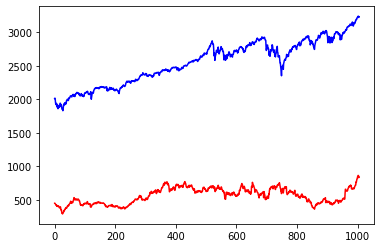

In [4]:
L = len(Tesla['Open'])
All_Data = np.concatenate((np.array(Tesla['Open']).reshape(L,1), np.array(Tesla['Close']).reshape(L,1), 
                           np.array(Tesla['High']).reshape(L,1), np.array(Tesla['Low']).reshape(L,1), np.array(Tesla['Volume']).reshape(L,1),
                           np.array(SP500['Open']).reshape(L,1), np.array(SP500['Close']).reshape(L,1),
                          np.array(SP500['High']).reshape(L,1), np.array(SP500['Low']).reshape(L,1), np.array(SP500['Volume']).reshape(L,1),), axis = 1)
plt.plot(np.array(Tesla['Close'])*10, 'r')  #Displayed at 10 times the scale for better visualization
plt.plot(np.array(SP500['Close']), 'b')


In [82]:
All_Data[1,5]

2013.780029296875

In [ ]:
All_Data.shape

(1006, 10)

Use sequences of 8 input arrays taken from All_Data. Each input will be of of length 50  (Last 50 days) and will be used to predict next five days. Try RNN, LSTM or GRU

In [116]:
# Creating the groups of 50 size inputs and 5 size output
# Prediction of opening price of each stock
# Normalisaton
Tesla_prior = []
Tesla_target = []
SP500_prior = []
SP500_target =[] 

# Individual Inputs for each stock 
Tesla_input = All_Data[:,0:5]
Tesla_input1 = All_Data[:,0] # This is used to obtain the target set for tesla stock price that is the opening price of tesla stock and similarly done for SP500 stocks
# In Tesla_input1 if index is changed then our target variable will be different and hence we can predict other parameters too.

SP500_input = All_Data[:,5:10]
SP500_input1 = All_Data[:,5]
for i in range(0,1006-55):
  T1 = np.array(Tesla_input[i:i+50])
  S1 = np.array(SP500_input[i:i+50])

  Max_Tesla = T1.max(0)
  Min_Tesla = T1.min(0)
  Max_Sp500 = S1.max(0)
  Min_Sp500 = S1.min(0)

  Tesla_prior.append((Tesla_input[i:i+50] - Min_Tesla)/Max_Tesla); # In all_data first 5 columns are of Tesla while the remaing belongs to SP500
  Tesla_target.append((Tesla_input1[i+50:i+55] - Min_Tesla[0])/Max_Tesla[0]); # The opening price for tesla is at 1st column that is 0th index
                                                                              # The opening price for SP500 is at 6th column that is 5th index
  SP500_prior.append((SP500_input[i:i+50] - Min_Sp500)/Max_Sp500);
  SP500_target.append((SP500_input1[i+50:i+55] - Min_Sp500[0])/Max_Sp500[0]);

Tesla_prior = np.array(Tesla_prior)
Tesla_target = np.array(Tesla_target)
SP500_prior = np.array(SP500_prior)
SP500_target = np.array(SP500_target)


In [117]:
Tesla_prior.shape

(951, 50, 5)

In [118]:
Tesla_target.shape

(951, 5)

In [119]:
SP500_prior.shape

(951, 50, 5)

In [120]:
SP500_target.shape

(951, 5)

In [121]:
xt_train, xt_test, yt_train, yt_test = train_test_split(Tesla_prior, Tesla_target, test_size = 0.2, random_state = 4);
xsp_train, xsp_test, ysp_train, ysp_test = train_test_split(SP500_prior, SP500_target, test_size = 0.2, random_state = 4);

In [122]:
xt_train.shape

(760, 50, 5)

In [123]:
yt_train.shape

(760, 5)

In [124]:
yt_test.shape

(191, 5)

In [127]:
# Model for Tesla Stocks
model = Sequential()
model.add(LSTM((128), batch_input_shape = (None,50 ,5), return_sequences = True))
model.add(LSTM((100), activation = 'relu', return_sequences = True))
model.add(LSTM((10), activation = 'relu', return_sequences = True))
model.add(LSTM((5), activation = 'relu', return_sequences = False))
model.compile(loss = 'mse',  optimizer = 'adam', metrics = ['mse'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_70 (LSTM)               (None, 50, 128)           68608     
_________________________________________________________________
lstm_71 (LSTM)               (None, 50, 100)           91600     
_________________________________________________________________
lstm_72 (LSTM)               (None, 50, 10)            4440      
_________________________________________________________________
lstm_73 (LSTM)               (None, 5)                 320       
Total params: 164,968
Trainable params: 164,968
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Model1 for SP500 Stocks
model1 = Sequential()
model1.add(LSTM((128), batch_input_shape = (None,50 ,5), return_sequences = True))
model1.add(LSTM((100), activation = 'relu', return_sequences = True))
model1.add(LSTM((10), activation = 'relu', return_sequences = True))
model1.add(LSTM((5), activation = 'relu', return_sequences = False))
model1.compile(loss = 'mse',  optimizer = 'adam', metrics = ['mse'])
model1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_74 (LSTM)               (None, 50, 128)           68608     
_________________________________________________________________
lstm_75 (LSTM)               (None, 50, 100)           91600     
_________________________________________________________________
lstm_76 (LSTM)               (None, 50, 10)            4440      
_________________________________________________________________
lstm_77 (LSTM)               (None, 5)                 320       
Total params: 164,968
Trainable params: 164,968
Non-trainable params: 0
_________________________________________________________________


In [136]:
history = model.fit(xt_train, yt_train, epochs = 100, validation_data = (xt_test, yt_test)) # training for Tesla stocks

Epoch 1/100
24/24 [==============================] - 3s 145ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 2/100
24/24 [==============================] - 3s 141ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 3/100
24/24 [==============================] - 3s 142ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 4/100
24/24 [==============================] - 3s 141ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 5/100
24/24 [==============================] - 3s 142ms/step - loss: 9.3118e-04 - mse: 9.3118e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 6/100
24/24 [==============================] - 3s 143ms/step - loss: 8.0886e-04 - mse: 8.0886e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 7/100
24/24 [==============================] - 3s 142ms/step - loss: 6.8763e-04 - mse: 6.8763e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 8/100
24/24 [==========================

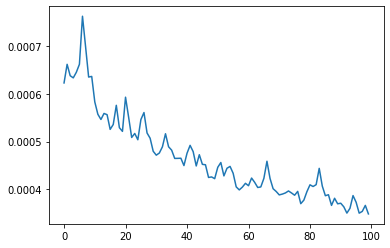

In [130]:
plt.plot(history.history['loss'])

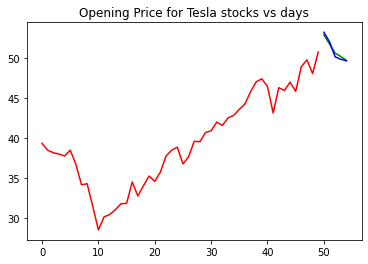

In [153]:
# Plotting the predicted opening price and comparing with the original opening price in 5 days for Tesla
data_Start_Point = 15;
test_Data = Tesla_input[data_Start_Point:data_Start_Point+50];
Opening_Price = Tesla_input1[data_Start_Point:data_Start_Point+50]
A = np.array(test_Data)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = Tesla_input1[data_Start_Point+50:data_Start_Point+55];
results = model.predict(((test_Data.reshape(50,5)-Mi)/Mx).reshape(1,50,5))
results = results*Mx[0] +Mi[0];
plt.title('Opening Price for Tesla stocks vs days')
plt.plot(range(0,50),Opening_Price, 'r')
plt.plot(range(50,55),results.reshape(5), 'g')
plt.plot(range(50,55),actual_Target, 'b')

In [139]:
# training for SP500 stocks
history1 = model1.fit(xsp_train, ysp_train, epochs = 100, validation_data = (xsp_test, ysp_test))

Epoch 1/100
24/24 [==============================] - 10s 185ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 2/100
24/24 [==============================] - 3s 144ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 3/100
24/24 [==============================] - 3s 146ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 4/100
24/24 [==============================] - 4s 147ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 5/100
24/24 [==============================] - 4s 147ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 6/100
24/24 [==============================] - 3s 141ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 7/100
24/24 [==============================] - 3s 142ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 8/100
24/24 [==============================] - 3s 143ms/step -

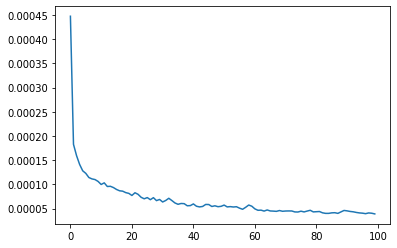

In [132]:
plt.plot(history.history['loss'])

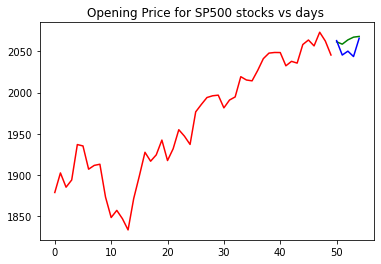

In [152]:
# Plotting the predicted opening price and comparing with the original opening price in 5 days for Tesla
data_Start_Point = 15;
test_Data = SP500_input[data_Start_Point:data_Start_Point+50];
Opening_Price = SP500_input1[data_Start_Point:data_Start_Point+50];
A = np.array(test_Data)
Mi = A.min(0);
Mx = A.max(0);
actual_Target = SP500_input1[data_Start_Point+50:data_Start_Point+55];
results = model1.predict(((test_Data.reshape(50,5)-Mi)/Mx).reshape(1,50,5))
results = results*Mx[0] +Mi[0];
plt.title('Opening Price for SP500 stocks vs days ')
plt.plot(range(0,50),Opening_Price, 'r')
plt.plot(range(50,55),results.reshape(5), 'g')
plt.plot(range(50,55),actual_Target, 'b')